# MBA em Ciência de Dados
# Técnicas Avançadas de Captura e Tratamento de Dados

### <span style="color:darkred">Módulo II - Tratamento e limpeza de dados</span>


### <span style="color:darkred">Exercícios - com soluções</span>

Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos

---

#### <span style="color:red">Recomenda-se fortemente que os exercícios sejam feitos sem consultar as respostas antecipadamente.</span>

---

In [18]:
# carregando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.svm import SVC
from sklearn.linear_model import Ridge
from sklearn import metrics

# carregando dados
data = pd.read_csv("./dados/houses_to_rent_mba4.csv")

A base de dados a ser utilizada durante todos os exercícios é `houses_to_rent_mba4.csv`.

As alterações feitas em um exercício devem ser mantidas para o próximo exercício, a não ser que expressamente indicado

---

### Exercício 1)

Inspecione o tipo dos atributos e seus valores, em particular, `city` e `country`. A seguir padronize valores dos atributos do tipo `object` que apareçam como distintos mas que deveriam ser os mesmos. Considere para a correção o valor mais frequente nesse atributo. Por exemplo: se tivermos escrito a seguinte sigla em 3 formas diferentes: `ICMC` (11 ocorrencias), `Icmc` (3 ocorrências), `I.C.M.C.` (2 ocorrências), todas devem ser convertidas para `ICMC`

Quantas linhas relativas a valores da coluna `city` e `country`, respectivamente, estavam fora do padrão e foram corrigidas?

(a) 49 e 2<br>
<font color='red'>(b) 48 e 4<br></font>
(c) 50 e 9<br>
(d) 48 e 54<br>


In [19]:
def verifica_atributos(df):
    for var in df:
        # imprime variavel e seu tipo
        print(var,":", df[var].dtype.name, end="")
        # se nao numérico
        if not np.issubdtype(df[var].dtype, np.number):
            print("\n\t",df[var].nunique(), "distintos: ", end="")
            print(df[var].unique())
        else:
            print(", intervalo: ",end="")
            print(df[var].min(), ",", df[var].max())

verifica_atributos(data)

Unnamed: 0 : int64, intervalo: 0 , 11767
city : object
	 7 distintos: ['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte'
 'Brotas' 'Sao Paulo']
area : float64, intervalo: 1.0 , 24606.0
rooms : float64, intervalo: 1.0 , 10.0
bathroom : int64, intervalo: 1 , 25
parking spaces : float64, intervalo: 1.0 , 12.0
floor : object
	 38 distintos: ['7' '20' '6' '2' '1' '-' '4' '3' '10' '11' '24' '0' '9' '8' '--' '17'
 '18' '5' '13' '15' nan '16' '14' '26' '21' '12' '19' '22' '27' '23' '35'
 '110' '25' '46' '28' '32' '29' '301' '51']
hoa : int64, intervalo: 0 , 1117000
rent : int64, intervalo: 200 , 45000
tax : object
	 1230 distintos: ['211' '1750' 'nr' ... '1737' '858' '2110']
insurance : int64, intervalo: 3 , 6000
total : float64, intervalo: 263.5 , 1119892.0
page hits : object
	 290 distintos: ['324' '720' '64' '46' '1548' '396' '240' '756' '2412' '828' '184' '360'
 '540' '1044' '88' '96' '112' '180' '1476' '186' '648' '416' '432' '60'
 '40' '900' '1440' '528' '20' '1116'

Os atributos cidade e país possuem dados não padronizados. Veremos os mais frequentes para substituir.

In [20]:
data["city"].value_counts()

São Paulo         7098
Rio de Janeiro    1452
Belo Horizonte    1199
Porto Alegre      1148
Campinas           816
Sao Paulo           48
Brotas               7
Name: city, dtype: int64

In [21]:
data["country"].value_counts()

Brazil    11764
Brasil        2
BR            2
Name: country, dtype: int64

In [22]:
# padronizando
data.loc[data['city']=='Sao Paulo','city'] = 'São Paulo'
data.loc[data['country']!='Brazil','country'] = 'Brazil'

In [23]:
data["city"].value_counts()

São Paulo         7146
Rio de Janeiro    1452
Belo Horizonte    1199
Porto Alegre      1148
Campinas           816
Brotas               7
Name: city, dtype: int64

In [24]:
data["country"].value_counts()

Brazil    11768
Name: country, dtype: int64

---

### Exercício 2)

Inspecione os valores dos atributos `floor` e `tax`, realizando a conversão dos mesmos para o tipo adequado. Para evitar gerar dados faltantes desnecessariamente, verifique primeiro o padrão dos dados errôneos e faltantes, e se possível preencha corretamente alguns desses valores (conforme feito em aula para o atributo `floor`).

OBS: uma forma de inspecionar valores de uma coluna do tipo `object` que podem ser convertidos para dígitos numéricos é executar `dataframe[atributo].astype(str).str.isnumeric()`

Após esse processo, quandos valores faltantes restaram em `floor` e `tax`, respectivamente?

<font color='red'>(a) 13 e 6<br></font>
(b) 78 e 9<br>
(c) 5 e 6<br>
(d) 9 e 13<br>

In [25]:
# inspecionando valores de floor
print(data.loc[~data['floor'].astype(str).str.isnumeric(), 'floor'].unique())

['-' '--' nan]


In [26]:
data.loc[data['type'] == 'house', ['floor','type']]

,floor,type
5,-,house
15,0,house
19,-,house
20,--,house
23,-,house
...,...,...
11763,-,house
11764,-,house
11765,0,house
11766,0,house


In [27]:
# notamos que os valores não numéricos são casas, assim
# substituiremos todos os valores não convertíveis para digitos por '0'
# note que os nulos (NaNs) não serão alterados para 0
data.loc[~data['floor'].astype(str).str.isnumeric() & data['floor'].notnull(), 'floor'] = '0'
data.loc[:,'floor'] = pd.to_numeric(data.loc[:,'floor'], downcast='integer', errors='coerce')
print(data['floor'].unique())

[  7.  20.   6.   2.   1.   0.   4.   3.  10.  11.  24.   9.   8.  17.
  18.   5.  13.  15.  nan  16.  14.  26.  21.  12.  19.  22.  27.  23.
  35. 110.  25.  46.  28.  32.  29. 301.  51.]


In [28]:
# inspecionando valores de tax não convertíveis para digitos
print(data.loc[~data['tax'].astype(str).str.isnumeric(), 'tax'].unique())

['nr' '47. 5' '750.9' '140. 5' 'nsa' '107 .12 ' '-' '---' 'nd']


In [29]:
# notar que o isnumeric não identificou números com casas decimais como convertíveis, mas esses serão convertidos pelo to_numeric.
# note ainda valores com possíveis erros de digitação contendo espaços
# Exemplo:
data.loc[data['tax'] =='47. 5',:]

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,hoa,rent,tax,insurance,total,page hits,days available,interactions,weeks available,type,country
71,71,Rio de Janeiro,35.0,4.0,3,1.0,0.0,0,200,47. 5,16,263.5,24,16,24,2,house,Brazil


In [30]:
# corrigindo o valor e convertendo para númerico, atribuindo nan para os demais
data.loc[:,'tax'] = data.loc[:,'tax'].str.replace(' ', '')
data.loc[data['tax'] =='47. 5',:]

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,hoa,rent,tax,insurance,total,page hits,days available,interactions,weeks available,type,country


In [31]:
print(data['floor'].unique())
data['tax'] = pd.to_numeric(data.loc[:,'tax'], downcast="float", errors='coerce')

[  7.  20.   6.   2.   1.   0.   4.   3.  10.  11.  24.   9.   8.  17.
  18.   5.  13.  15.  nan  16.  14.  26.  21.  12.  19.  22.  27.  23.
  35. 110.  25.  46.  28.  32.  29. 301.  51.]


In [32]:
data.loc[71,:]

Unnamed: 0                     71
city               Rio de Janeiro
area                         35.0
rooms                         4.0
bathroom                        3
parking spaces                1.0
floor                         0.0
hoa                             0
rent                          200
tax                          47.5
insurance                      16
total                       263.5
page hits                      24
days available                 16
interactions                   24
weeks available                 2
type                        house
country                    Brazil
Name: 71, dtype: object

In [33]:
data.isna().sum()

Unnamed: 0            0
city                  0
area                 78
rooms                79
bathroom              0
parking spaces     2965
floor                13
hoa                   0
rent                  0
tax                   6
insurance             0
total                 0
page hits             0
days available        0
interactions          0
weeks available       0
type                  0
country               0
dtype: int64

---
### Exercício 3)

Vamos analisar possíveis atributos redundantes na base de dados. Inspecione as colunas imprimindo quantos valores únicos cada uma possui. Considerando o tamanho da base de dados e esses resultados, quais atributos são redundantes e podem ser removidos sem perda de informação?

(a) parking spaces, country<br>
<font color='red'>(b) country, Unnamed:0</font><br>
(c) country<br>
(d) Unnamed:0<br>

<font color='red'>Resposta</font>: *country possui todos os valores iguais, após padronização, já Unnamed:0 contem a repetição dos índices do dataframe: ambos podem ser removidos sem prejuízo para a análise*

In [16]:
# inspecionando atributos nao numéricos
for var in data:
    print(var, ' / únicos : ', data[var].unique().shape[0])

Unnamed: 0  / únicos :  11768
city  / únicos :  6
area  / únicos :  509
rooms  / únicos :  11
bathroom  / únicos :  12
parking spaces  / únicos :  10
floor  / únicos :  37
hoa  / únicos :  1620
rent  / únicos :  1172
tax  / únicos :  1223
insurance  / únicos :  218
total  / únicos :  6132
page hits  / únicos :  290
days available  / únicos :  157
interactions  / únicos :  217
weeks available  / únicos :  51
type  / únicos :  2
country  / únicos :  1


In [17]:
del data['Unnamed: 0']
del data['country']

---

### Exercício 4)

Vamos procurar por outliers na base de dados utilizando um método baseado na dispersão pelo *desvio padrão*. 

Codifique uma função em Python no formato abaixo, que receba por parâmetro um dataframe, uma lista de atributos/variáveis e um fator multiplicador `t` para o desvio padrão.
`def remove_outliers_std(df, attributes, t):`

Essa função deve retornar um dataframe sem os outliers segundo o método do desvio padrão, ou seja, removendo aqueles cujo valor esteja: abaixo da média menos `t` desvios padrões, ou acima da média mais `t` desvios padrões. Formalmente, são outliers valores $x$ tal que $x < \mu - t\sigma$ ou $x > \mu + t\sigma$. A funcao deve processar apenas variáveis numéricas e imprimir na tela a quantidade de outliers encontrados.

Utilize a funcao implementada para remover outliers. Antes faça uma cópia do dataframe, criando um dataframe `data_out` do qual serão removidos outliers dos seguintes atributos:
1. 'insurance' com $t=3.5$
2. considerando a base obtida no passo (1) anterior, para 'total' com $t=2$.
3. considerando a base obtida no passo (2) anterior, para 'rent' com $t=5$

Quantos outliers foram encontrados respectivamente para 'insurance', 'total' e  'rent', nessa ordem?

(a) 19, 6 e 0<br>
(b) 0, 6 e 2<br>
<font color='red'>(c) 19, 6 e 2</font><br>
(d) 19, 0 e 6<br>

In [18]:
def remove_outliers_std(df, attributes, t):
    
    dfn = df.copy()
    
    for var in attributes:
        # verifica se variável é numerica
        if np.issubdtype(df[var].dtype, np.number):
            crit_std = df[var].std() * t
            mu = df[var].mean()
            
            tot_out = np.sum((df[var] < mu-crit_std) | (df[var] > mu+crit_std))
            
            # apenas inliers segundo std
            dfn = dfn.loc[(df[var] >= mu-crit_std) & (df[var] <= mu+crit_std),:]
            print('%s, mu = %.2f, std = %.2f, outliers = %d' % (var, mu, crit_std/t, tot_out))
            
    return dfn

In [19]:
data_out = remove_outliers_std(data,['insurance'], 3.5)
data_out = remove_outliers_std(data_out,['total'], 2)
data_out = remove_outliers_std(data_out,['rent'], 5)

insurance, mu = 56.54, std = 97.48, outliers = 19
total, mu = 5585.31, std = 15774.00, outliers = 6
rent, mu = 3997.23, std = 3427.39, outliers = 2


In [20]:
data_out

,city,area,rooms,bathroom,parking spaces,floor,hoa,rent,tax,insurance,total,page hits,days available,interactions,weeks available,type
0,São Paulo,70.0,2.0,1,1.0,7.0,2065,3300,211.0,42,5618.0,324,23,108,3,flat
1,São Paulo,320.0,4.0,4,2.0,20.0,1200,4960,1750.0,63,7973.0,720,78,240,11,flat
2,Porto Alegre,80.0,1.0,1,1.0,6.0,1000,2800,NaN,41,3841.0,64,269,128,38,flat
3,Porto Alegre,51.0,1.0,1,NaN,2.0,270,1112,22.0,17,1421.0,46,73,92,10,flat
4,São Paulo,25.0,1.0,1,NaN,1.0,0,800,25.0,11,836.0,1548,78,516,11,flat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11763,Brotas,100.0,1.0,2,1.0,0.0,0,800,116.0,39,955.0,148,127,148,18,house
11764,Brotas,200.0,4.0,2,1.0,0.0,0,1450,226.0,75,1751.0,104,85,104,12,house
11765,São Paulo,600.0,4.0,5,6.0,0.0,0,12000,9500.0,181,21681.0,180,42,60,6,house
11766,São Paulo,650.0,3.0,3,7.0,0.0,0,8000,834.0,121,8955.0,396,66,132,9,house


---

### Exercício 5)

Ainda analisando outliers, considerando a base de dados original (antes da remoção no exercício anterior)

Carregue o método $k$-Means utilizando: `from sklearn.cluster import KMeans`

1. Realize análise de agrupamento utilizando os atributos 'rent' e 'days available' e $k=100$ grupos. Utilize o parâmetro `random_state=0` ao criar o modelo
2. Identifique os grupos (clusters) que possuem 5 ou menos pontos
3. Considere todos os pontos pertencentes à esses grupos como candidatos a outliers
    
OBS: ver detalhes do KMeans em [https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html]

Quantos outliers foram encontrados?

(a) 1<br>
(b) 3<br>
<font color='red'>(c) 7</font><br>
(d) 20<br>

Número de outliers estimados: 7


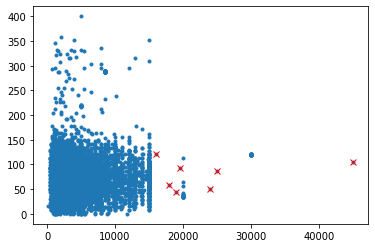

In [21]:
from sklearn.cluster import KMeans
from sklearn import metrics

X1 = np.array(data['rent'])
X2 = np.array(data['days available'])
X = np.vstack((X1,X2)).T

k = 100
kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
outputs = kmeans.labels_

small_clusters = []
outliers = np.array([ ])
for i in range(k):
    if (np.sum(outputs == i) <= 5 ):
        small_clusters.append(i)
        points = np.where(outputs == i)[0]
        outliers = np.concatenate((outliers, points)).astype(int)

n_outl_ = outliers.shape[0]

print('Número de outliers estimados: %d' % n_outl_)

plt.plot(X1, X2,'.')
plt.plot(X1[outliers], X2[outliers],'xr')
plt.show()

---

### Exercício 6)

Considerando o preenchimento de dados faltantes, utilize a base de dados após remover outliers segundo indicado no Exercício 4 `data_out`

Codifique uma funcão que preencha valores faltantes de variáveis numéricas utilizando a média condicionada (ou agrupada) a uma outra variável categórica (não numérica)  C da base. Essa funcao deverá:
1. calcular a média da variável alvo A (a ser preenchida) relativa a cada valor distinto da variável categórica selecionada C, para linhas com valores existentes de A
2. atribuir a média calculada de forma agrupada a todas as linhas cuja variável alvo é faltante e que possua o valor da variável categórica correspondente
3. o valor atribuido deve seguir o mesmo tipo da variável alvo, ou seja, int, float, etc. Quando int, realize o arredondamento utlizando `np.round(,0)`, quando float64 utilize `np.round(,1)`

    Exemplo: podemos preencher a média do imposto (tax) condicionado ao tipo (type) calculando a média do imposto agrupado por cada valor de tipo ('house' e 'flat'), e depois atribuir essas médias aos valores faltantes condicionado ao tipo, ou seja, a média do imposto de todas linhas 'house' é atribuída a todas as propriedades 'house' com 'tax' faltante
    Similarmente, uma propriedade que é do tipo 'flat' e que possui 'tax' faltante, recebe a média de 'tax' entre todas os imóveis marcados com 'flat' para os quais há valor de 'tax'.
    
Use sua funcao para preencher a 'area' condicionado a 'type'. Armazene esse preenchimento num dataframe novo, não afetando os anteriores. Após o preenchimento, qual é a nova média para todas as linhas do atributo 'area', e arredondando para duas casas decimais?

<font color='red'>(a) 145.36</font><br>
(b) 125.45<br>
(d) 131.00<br>
(d) 145.29<br>

In [22]:
def missing_condmean(df, att, att_cat):
        
    dfn = df.copy()
    print('- preencher ', att, ' condicionado a ', att_cat, end=' : ')
    nullatt = dfn[att].isnull()
    print(np.sum(nullatt), 'faltantes')

    for j in df[att_cat].unique():
        mu_cat = np.round(np.mean(df.loc[df[att_cat]==j, att]),1)
        
        if (df[att_cat].dtypes == np.int64):
            mu_cat = np.round(mu_cat,0)
            
        print('\t %s media = %.1f' % (j, mu_cat))
        dfn.loc[(df[att].isnull()) & (df[att_cat]==j), att] = mu_cat
        
    return dfn

In [23]:
data_fill = missing_condmean(data_out, 'area', 'type')
data_fill[data_out['area'].isnull()].head()

print('Média do atributo antes do preenchimento: ', np.round(np.mean(data_out.loc[:, 'area']),2))
print('Depois do preenchimento: ', np.round(np.mean(data_fill.loc[:, 'area']),2))

- preencher  area  condicionado a  type : 78 faltantes
	 flat media = 119.9
	 house media = 232.9
Média do atributo antes do preenchimento:  145.3
Depois do preenchimento:  145.36


---

### Exercício 7)

Utilizando a base de dados **antes** da remoção de outliers, elimine todas as linhas duplicadas. Quantas linhas foram removidas?

(a) 0 <br>
<font color='red'>(b) 1270</font><br>
(c) 2018<br>
(d) 1260<br>


In [24]:
n_antes = data.shape[0]

# removendo duplicatas
data_r = data.drop_duplicates(keep='first')
removidas = n_antes-data_r.shape[0]
print("Linhas removidas: %d" % (removidas))

Linhas removidas: 1270


---

### Exercício 8)

Utilizando a base de dados **após** da remoção de outliers (`data_out`), elimine todas as linhas duplicadas.

(a) 1272<br>
(b) 1<br>
(c) 0<br>
<font color='red'>(d) 1262</font><br>


In [25]:
n_antes = data_out.shape[0]

# removendo duplicatas
data_outr = data_out.drop_duplicates(keep='first')
removidas = n_antes-data_outr.shape[0]
print("Linhas removidas: %d" % (removidas))

Linhas removidas: 1262


---

### Exercício 9)

Considere o atributo 'type' e analise a distribuicao dos seus valores.

Qual dos procedimentos abaixo é o mais adequado caso desejamos utilizar a variável "type" como variável alvo (de saída) para um modelo de aprendizado?

(a) não é possível utilizar essa variável como saída<br>
(b) considerar o uso de técnicas de subamostragem aleatória para 'house'<br>
<font color='red'>(c) considerar o uso de técnicas de sobreamostragem para 'house'</font><br>
(d) considerar o uso de técnicas de sobreamostragem para 'flat' <br>

<font color='red'>Resposta:</font> *ainda que não fazer nenhum tratamento seja possível, considerar a sobreamostragem de 'house' pode ser importante nesse cenário em que 'house' corresponde a 22% dos dados
    
    

porcentagem frente ao total: 22.5364%


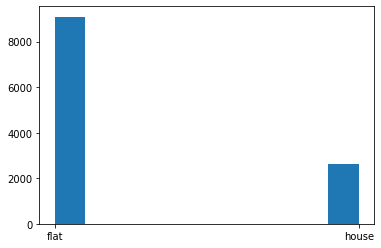

In [26]:
plt.hist(data_fill['type'])
data_fill['type'].describe()

tot_house = np.sum(data_fill['type']=='house')

print("porcentagem frente ao total: %.4f%%" % ((tot_house/data_fill.shape[0])*100))

---

### Exercício 10)

Considere o atributo 'city' e a distribuicao dos seus valores, desconsiderando a cidade de São Paulo.
Calcule a porcentagem de exemplos da categoria com a *menor* quantidade de dados encontrada com relacao ao total.

Qual dos procedimentos abaixo é o mais adequado caso desejamos utilizar a variável "city" (desconsiderando São Paulo) como variável alvo (de saída) para um modelo de aprendizado?

<font color='red'>(a) não considerar a cidade "Brotas" na análise, e rebalancear as demais com sobreamostragem</font><br>
(b) utilizar a base de dados original, sem tratamento, visto ser uma proporção possível considerando o tamanho das cidades<br>
(c) utilizar o método SMOTE para a classe minoritária apenas<br>
(d) utilizar técnicas de subamostragem para as categorias majoritárias<br>

<font color='red'>Resposta:</font> *ainda que considerar métodos para tratar o desbalanceamento seja possível, Brotas possui 0.6% do total de dados, inviabilizando seu uso frente às demais cidades, sendo recomendado descartá-la. Mesmo o uso de métodos de aumentação/sobreamostragem podem ser inviáveis, ao realizar a combinação de apenas 7 instâncias frente a segunda classe com menor número de instâncias reais, Campinas com mais de 800 exemplos.*

In [31]:
data_fill.loc[data_fill['city']!='São Paulo', 'city'].value_counts()

Rio de Janeiro    1449
Belo Horizonte    1197
Porto Alegre      1147
Campinas           816
Brotas               7
Name: city, dtype: int64

porcentagem frente ao total dos dados: 0.0596%


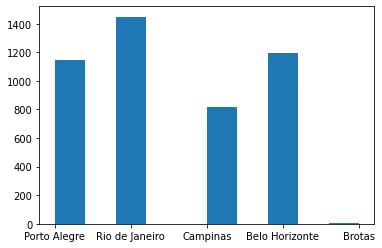

In [33]:
plt.hist(data_fill.loc[data_fill['city']!='São Paulo', 'city'])
print("porcentagem frente ao total dos dados: %.4f%%" % ((tot_brotas/data_fill.shape[0])*100))